### Завантаження вхідних даних та підключення модулів

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
test_data = pd.read_csv("application_test.csv")
train_data = pd.read_csv("application_train.csv")

### Аналіз розмірів даних

In [2]:
print(test_data.shape)
print(train_data.shape)

(48744, 121)
(307511, 122)


**Бачимо, що тренувальні дані містять на одну колонку більше. Знайдемо цю колонку:**

In [3]:
train_data.columns.difference(test_data.columns)

Index(['TARGET'], dtype='object')

**Знайдемо унікальні дані, які містяться у колонці TARGET:**

In [4]:
train_data.TARGET.unique()

array([1, 0], dtype=int64)

**Бачимо, що колонка містить категоріальні дані.**

**Перші п'ять колонок даних:**

In [5]:
train_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**Знайдемо відсоток відсутніх даних у колонках та виведемо отримані результати у вигляді таблиці:**

Перевірочні дані:

In [6]:
print(test_data.isnull().sum().sort_values(ascending=False)/len(test_data)*100)

COMMONAREA_AVG                  68.716150
COMMONAREA_MODE                 68.716150
COMMONAREA_MEDI                 68.716150
NONLIVINGAPARTMENTS_AVG         68.412523
NONLIVINGAPARTMENTS_MODE        68.412523
NONLIVINGAPARTMENTS_MEDI        68.412523
FONDKAPREMONT_MODE              67.284179
LIVINGAPARTMENTS_AVG            67.249302
LIVINGAPARTMENTS_MODE           67.249302
LIVINGAPARTMENTS_MEDI           67.249302
FLOORSMIN_MEDI                  66.605121
FLOORSMIN_AVG                   66.605121
FLOORSMIN_MODE                  66.605121
OWN_CAR_AGE                     66.289184
YEARS_BUILD_AVG                 65.275726
YEARS_BUILD_MEDI                65.275726
YEARS_BUILD_MODE                65.275726
LANDAREA_MEDI                   57.964057
LANDAREA_AVG                    57.964057
LANDAREA_MODE                   57.964057
BASEMENTAREA_MEDI               56.706466
BASEMENTAREA_AVG                56.706466
BASEMENTAREA_MODE               56.706466
NONLIVINGAREA_AVG               53

Тренувальні дані:

In [7]:
print(train_data.isnull().sum().sort_values(ascending=False)/len(train_data)*100)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

Бачимо, що в тренувальних даних в деяких колонках пустих значень в декілька разів більше, ніж у відповідних колонках у тестувальному датасеті.Таким чином, доцільно буде виключити такі колонки з списку фіч, за якими будемо тренуватись.

### Кореляція з цільовою змінною

In [8]:
corellations = train_data.corr()['TARGET'].sort_values()
print('Найбільша негативна кореляція')
print(corellations.head(10))

Найбільша негативна кореляція
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [9]:
print('Найбільша позитивна кореляція')
print(corellations.tail(20))

Найбільша позитивна кореляція
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


### Видалення колонок, які погано кореллють з цільовою змінною

In [10]:
features = [# залишаємо дані, які краще корелюють з цільовою змінною та мають мало пустих значень
    'TARGET',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'EXT_SOURCE_2',
    'NAME_INCOME_TYPE',
    'AMT_GOODS_PRICE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'NAME_EDUCATION_TYPE',
    'AMT_CREDIT',
    'EXT_SOURCE_3'
]
opt_train_data = train_data[features]
features.remove('TARGET') # видаляємо колонку, оскільки її немає у тестовому датасеті
opt_test_data = test_data[features]

In [11]:
print(opt_train_data.isnull().sum().sort_values(ascending=False)/len(opt_train_data)*100)

EXT_SOURCE_3           19.825307
EXT_SOURCE_2            0.214626
AMT_GOODS_PRICE         0.090403
TARGET                  0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
NAME_EDUCATION_TYPE     0.000000
AMT_CREDIT              0.000000
dtype: float64


In [12]:
zero_columns_train = ['EXT_SOURCE_3','EXT_SOURCE_2','AMT_GOODS_PRICE']
zero_columns_test = ['EXT_SOURCE_3', 'EXT_SOURCE_2']
opt_train_data[zero_columns_train] = opt_train_data[zero_columns_train].fillna(value=opt_train_data[zero_columns_train].mean())
opt_test_data[zero_columns_test] = opt_test_data[zero_columns_test].fillna(value=opt_test_data[zero_columns_test].mean())

### Пошук категоріальних даних

**Щоб знайти категоріальні дані, виберемо колонки, які мають тип object**

In [13]:
train_data.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

**Чи містить повторювання?**

In [14]:
len(train_data[train_data.duplicated()])
len(test_data[test_data.duplicated()])

0

### Статистичний опис даних

In [15]:
opt_train_data.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,EXT_SOURCE_2,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,AMT_CREDIT,EXT_SOURCE_3
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000,3.075110e+05,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.143927e-01,5.383962e+05,-16036.995067,63815.045904,5.990260e+05,0.510853
std,0.272419,0.722121,2.371231e+05,1.908550e-01,3.692794e+05,4363.988632,141275.766519,4.024908e+05,0.174464
min,0.000000,0.000000,2.565000e+04,8.173617e-08,4.050000e+04,-25229.000000,-17912.000000,4.500000e+04,0.000527
25%,0.000000,0.000000,1.125000e+05,3.929737e-01,2.385000e+05,-19682.000000,-2760.000000,2.700000e+05,0.417100
50%,0.000000,0.000000,1.471500e+05,5.654672e-01,4.500000e+05,-15750.000000,-1213.000000,5.135310e+05,0.510853
75%,0.000000,1.000000,2.025000e+05,6.634218e-01,6.795000e+05,-12413.000000,-289.000000,8.086500e+05,0.636376
max,1.000000,19.000000,1.170000e+08,8.549997e-01,4.050000e+06,-7489.000000,365243.000000,4.050000e+06,0.896010


In [16]:
opt_test_data.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,EXT_SOURCE_2,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,AMT_CREDIT,EXT_SOURCE_3
count,48744.000000,4.874400e+04,48744.000000,4.874400e+04,48744.000000,48744.000000,4.874400e+04,48744.000000
mean,0.397054,1.784318e+05,0.518021,4.626188e+05,-16068.084605,67485.366322,5.167404e+05,0.500106
std,0.709047,1.015226e+05,0.181263,3.367102e+05,4325.900393,144348.507136,3.653970e+05,0.171825
min,0.000000,2.694150e+04,0.000008,4.500000e+04,-25195.000000,-17463.000000,4.500000e+04,0.000527
25%,0.000000,1.125000e+05,0.408082,2.250000e+05,-19637.000000,-2910.000000,2.606400e+05,0.399676
50%,0.000000,1.575000e+05,0.558728,3.960000e+05,-15785.000000,-1293.000000,4.500000e+05,0.500106
75%,1.000000,2.250000e+05,0.658480,6.300000e+05,-12496.000000,-296.000000,6.750000e+05,0.624615
max,20.000000,4.410000e+06,0.855000,2.245500e+06,-7338.000000,365243.000000,2.245500e+06,0.882530


**Оскільки дата народження не повинна бути від'ємною, необхідно взяти її за модулем**

In [17]:
opt_train_data['DAYS_BIRTH'] = abs(opt_train_data['DAYS_BIRTH'])
opt_test_data['DAYS_BIRTH'] = abs(opt_test_data['DAYS_BIRTH'])

### Розподіли тренувальних даних

array([[<AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>],
       [<AxesSubplot:title={'center':'EXT_SOURCE_2'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>],
       [<AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_3'}>]], dtype=object)

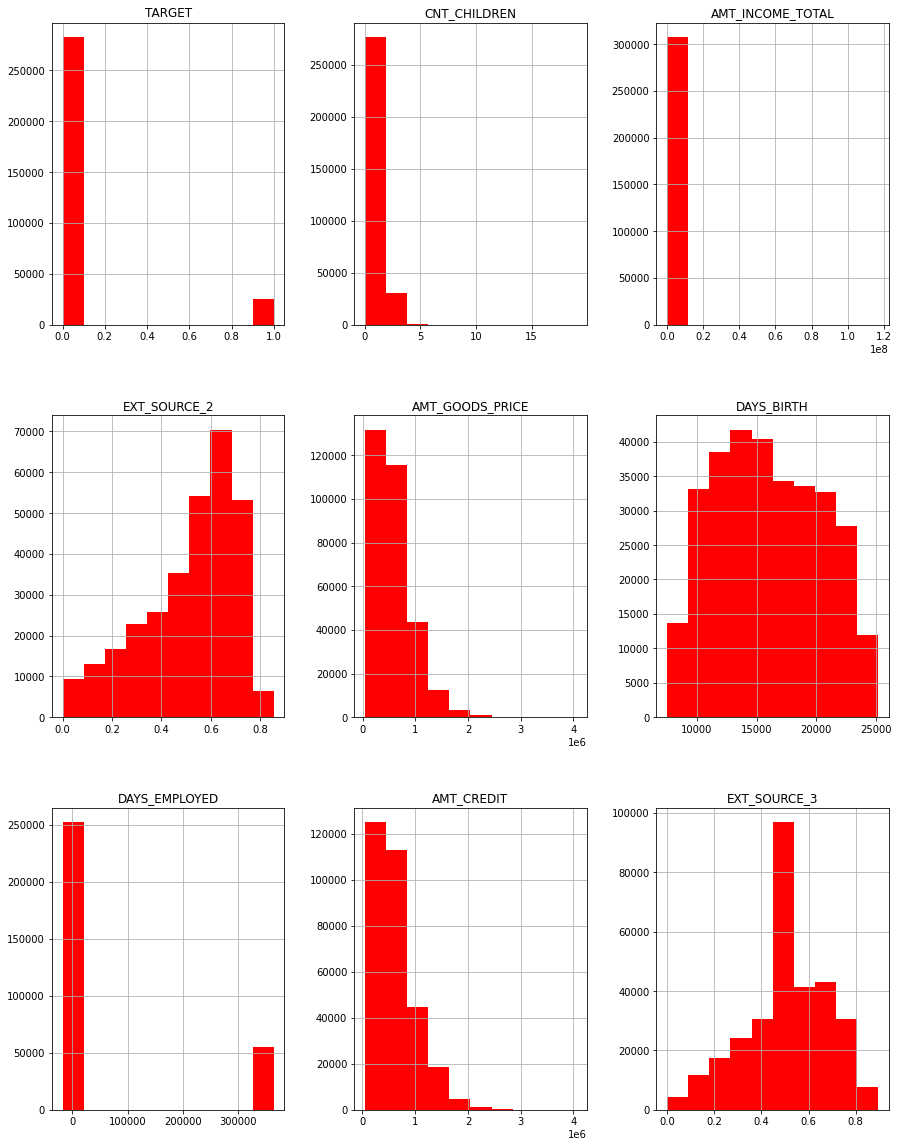

In [18]:
opt_train_data.hist(figsize=(15, 20), color = 'r', bins=10)

**Дослідимо аномалію DAYS_EMPLOYED:**

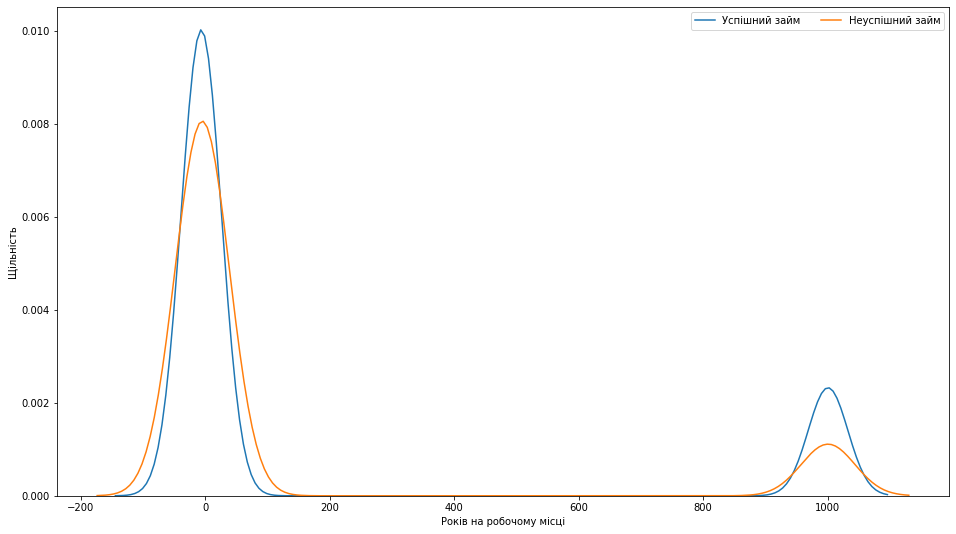

In [19]:
plt.figure(figsize=(16,9))
sns.kdeplot(opt_train_data.loc[opt_train_data['TARGET'] == 0, 'DAYS_EMPLOYED'] / 365)
# проблемные займы
sns.kdeplot(opt_train_data.loc[opt_train_data['TARGET'] == 1, 'DAYS_EMPLOYED'] / 365)
plt.xlabel('Років на робочому місці')
plt.ylabel('Щільність')
plt.legend(['Успішний займ', 'Неуспішний займ'], ncol=2, loc='upper right')

In [20]:
anomalies = opt_train_data[(opt_train_data['DAYS_EMPLOYED']/365>=800)]
len(anomalies)

55374

Text(0.5, 0, 'Років на роботі перед займом')

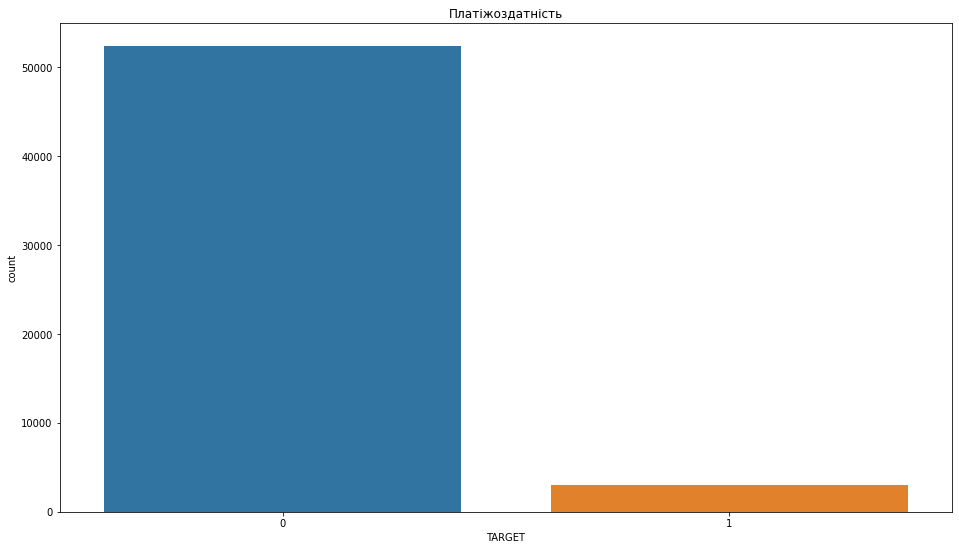

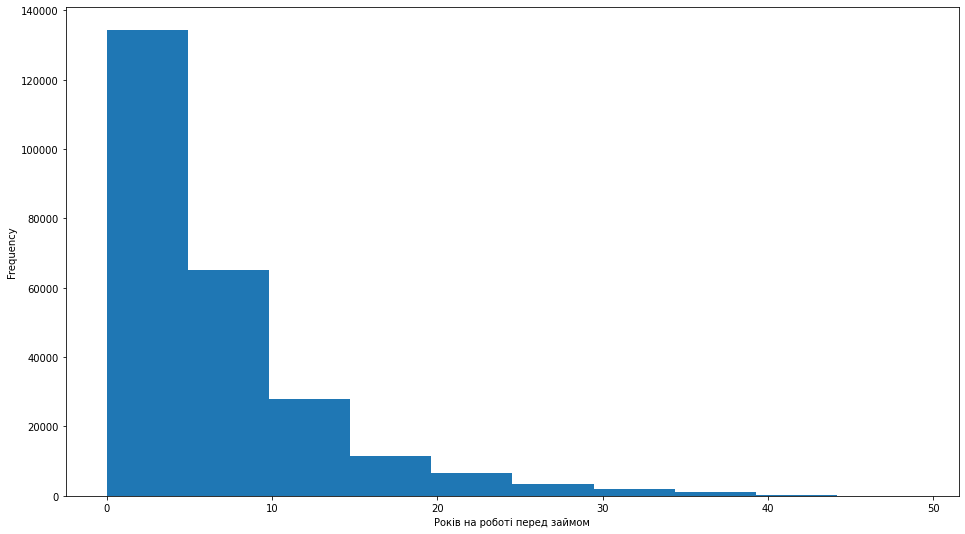

In [21]:
plt.figure(figsize = (16, 9))
plt.title('Платіжоздатність')
sns.countplot(x='TARGET',data=anomalies)
opt_train_data['DAYS_EMPLOYED_ANOM'] = opt_train_data["DAYS_EMPLOYED"] == 365243
opt_train_data['DAYS_EMPLOYED'] = opt_train_data['DAYS_EMPLOYED'].replace({365243: np.nan})
plt.figure(figsize=(16,9))
(opt_train_data['DAYS_EMPLOYED']/-365).plot.hist()
plt.xlabel('Років на роботі перед займом')

**Можемо об'єднати аномалії з іншими записами, оскільки відсоток якісних запитів у них досить високий.**

### Перетворення в категоріальні дані

За допомогою методу get_dummies присвоїмо кожному значенню категорії числову відмітку:

In [22]:
cat_feat = "NAME_EDUCATION_TYPE"
opt_train_data[cat_feat] = opt_train_data[cat_feat].astype('category').cat.codes
opt_test_data[cat_feat] = opt_test_data[cat_feat].astype('category').cat.codes
opt_train_data = pd.get_dummies(opt_train_data)
opt_test_data = pd.get_dummies(opt_test_data)
opt_train_data.head()
opt_train_data.dtypes

TARGET                                     int64
CNT_CHILDREN                               int64
AMT_INCOME_TOTAL                         float64
EXT_SOURCE_2                             float64
AMT_GOODS_PRICE                          float64
DAYS_BIRTH                                 int64
DAYS_EMPLOYED                            float64
NAME_EDUCATION_TYPE                         int8
AMT_CREDIT                               float64
EXT_SOURCE_3                             float64
DAYS_EMPLOYED_ANOM                          bool
FLAG_OWN_CAR_N                             uint8
FLAG_OWN_CAR_Y                             uint8
FLAG_OWN_REALTY_N                          uint8
FLAG_OWN_REALTY_Y                          uint8
NAME_INCOME_TYPE_Businessman               uint8
NAME_INCOME_TYPE_Commercial associate      uint8
NAME_INCOME_TYPE_Maternity leave           uint8
NAME_INCOME_TYPE_Pensioner                 uint8
NAME_INCOME_TYPE_State servant             uint8
NAME_INCOME_TYPE_Stu

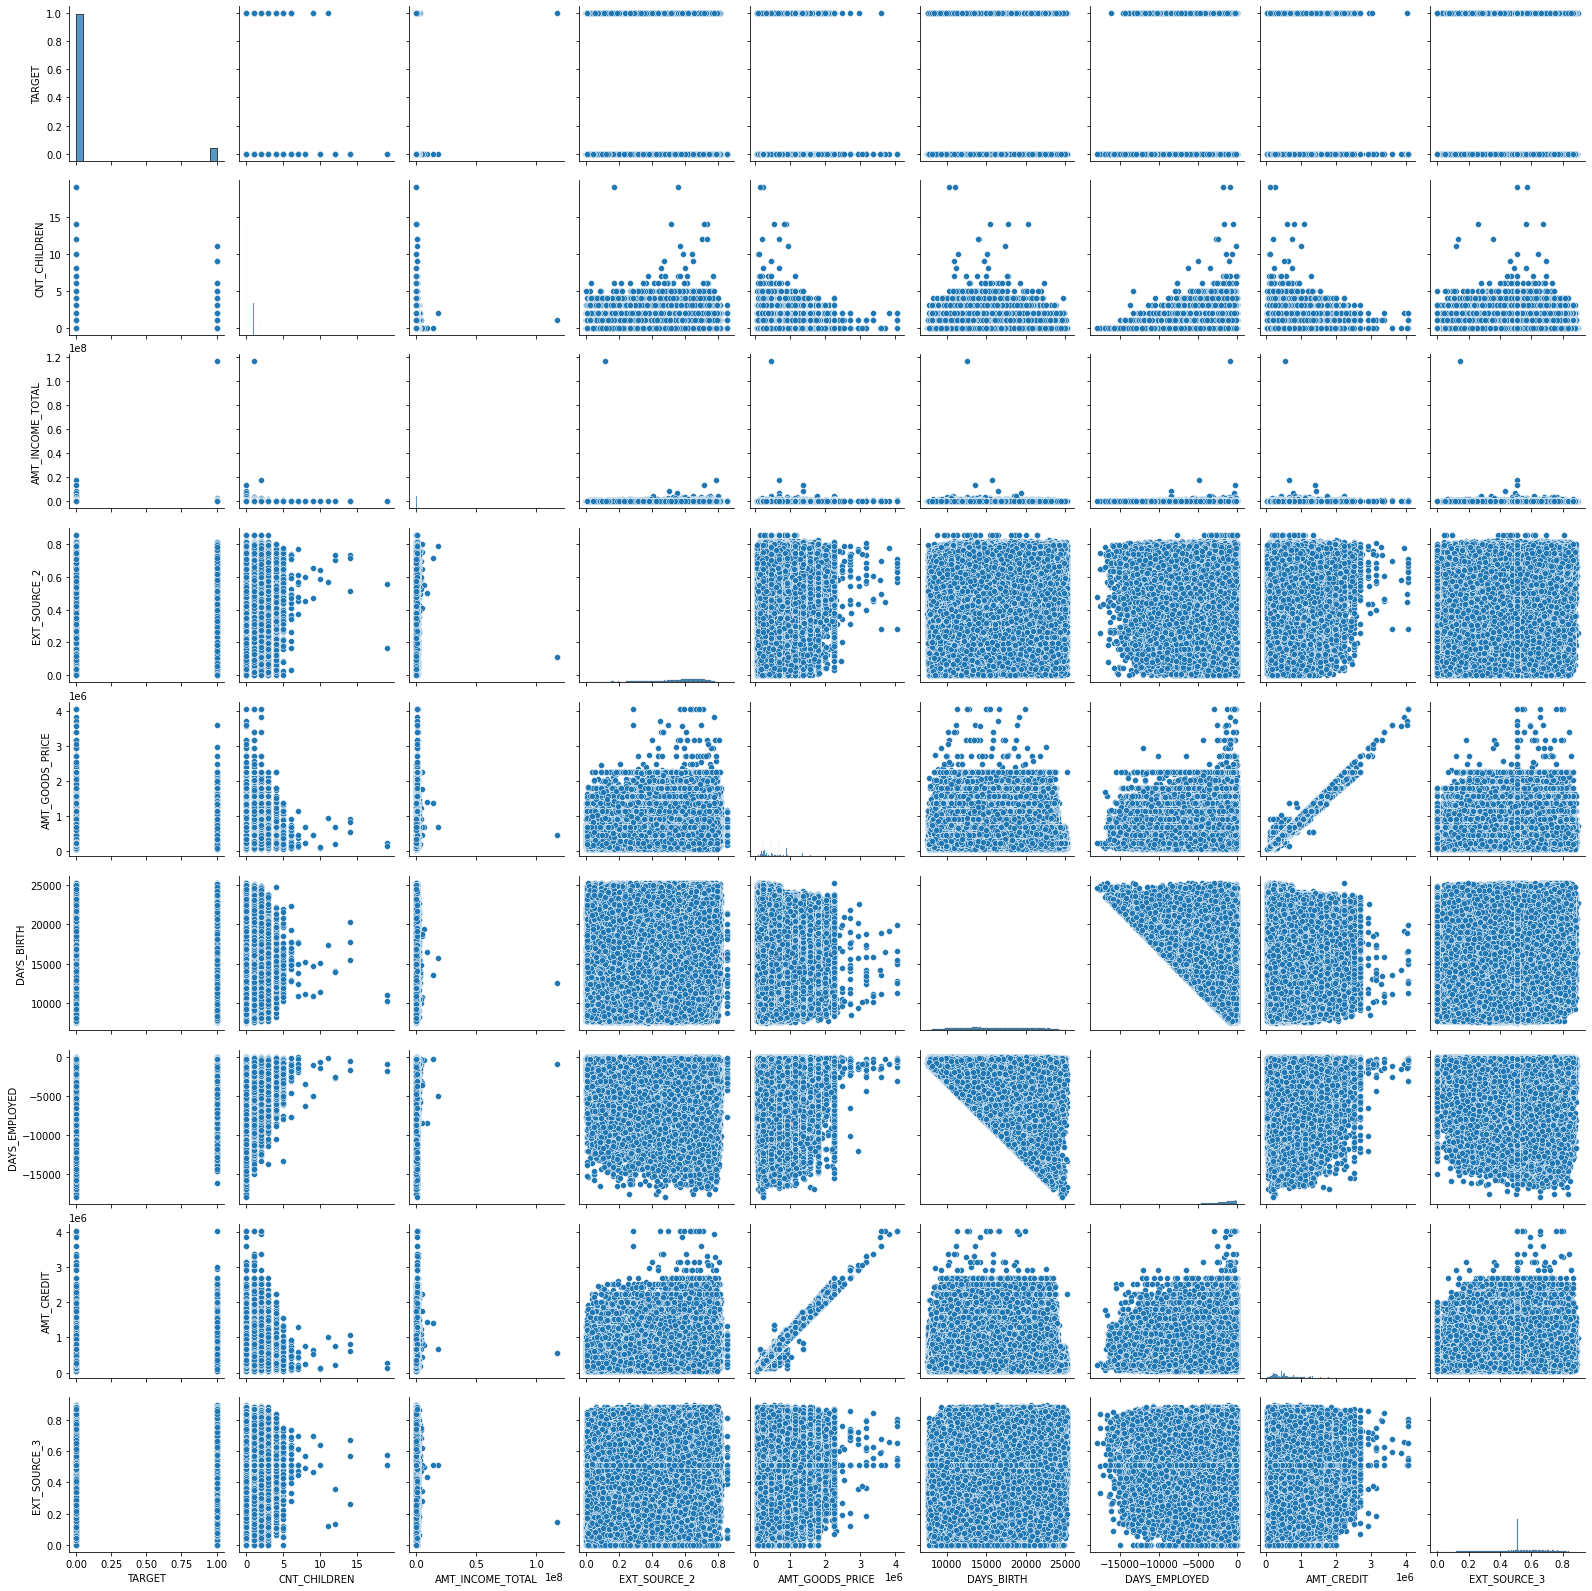

In [23]:
sns.pairplot(opt_train_data.select_dtypes(include=["int64","float64"]))

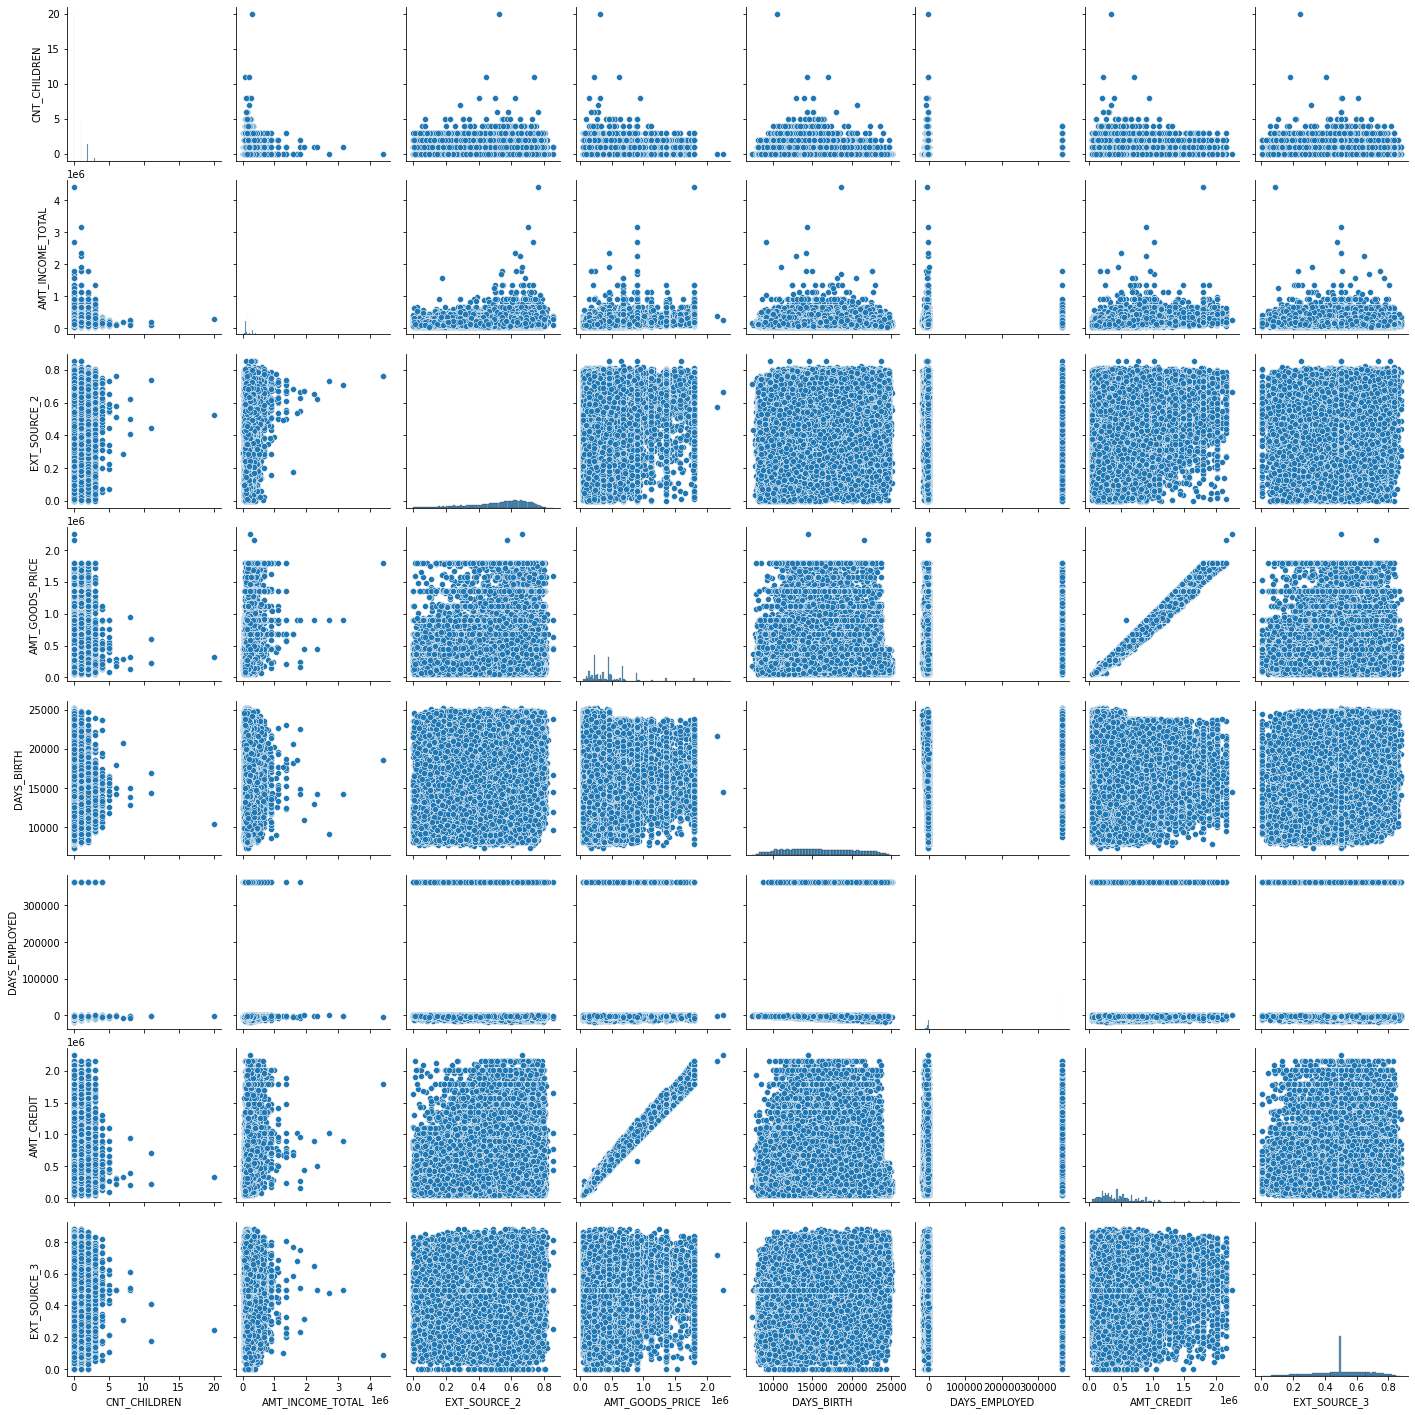

In [24]:
sns.pairplot(opt_test_data.select_dtypes(include=["int64","float64"]))

In [25]:
final_train_data=opt_train_data[opt_test_data.columns]

### Навчання моделі

In [26]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

data_test = pd.read_csv("application_test.csv")
data_train = pd.read_csv("application_train.csv")
features = [# залишаємо дані, які краще корелюють з цільовою змінною та мають мало пустих значень
    'TARGET',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'EXT_SOURCE_2',
    'NAME_INCOME_TYPE',
    'AMT_GOODS_PRICE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'NAME_EDUCATION_TYPE',
    'AMT_CREDIT',
    'EXT_SOURCE_3'
]
opt_train_data = train_data[features]
features.remove('TARGET')
opt_test_data = test_data[features]
# заповнення пропущених даних середнім
opt_train_data[['EXT_SOURCE_3','EXT_SOURCE_2','AMT_GOODS_PRICE']] = opt_train_data[['EXT_SOURCE_3','EXT_SOURCE_2','AMT_GOODS_PRICE']].fillna(value=opt_train_data[['EXT_SOURCE_3','EXT_SOURCE_2','AMT_GOODS_PRICE']].mean())
opt_test_data[['EXT_SOURCE_3','EXT_SOURCE_2']] = opt_test_data[['EXT_SOURCE_3','EXT_SOURCE_2']].fillna(value=opt_test_data[['EXT_SOURCE_3','EXT_SOURCE_2']].mean())
# беремо вік за модулем
opt_train_data['DAYS_BIRTH'] = abs(train_data['DAYS_BIRTH'])
opt_test_data['DAYS_BIRTH'] = abs(test_data['DAYS_BIRTH'])


opt_train_data = pd.get_dummies(opt_train_data)
opt_test_data = pd.get_dummies(opt_test_data)
final_train_data=opt_train_data[opt_test_data.columns]
len(opt_train_data.columns)

train_x, test_x, train_y, test_y = train_test_split(final_train_data, opt_train_data["TARGET"], test_size=0.2)

clf = LGBMClassifier()
clf.fit(train_x, train_y)
train_preds = clf.predict(train_x)
print(f"Train Accuracy: {accuracy_score(train_y, train_preds)}")
test_preds = clf.predict(test_x)
print(f"Test Accuracy: {accuracy_score(test_y, test_preds)}")
probabilities = clf.predict_proba(opt_test_data)
pd.DataFrame({
    'SK_ID_CURR': data_test['SK_ID_CURR'],
    'TARGET':     [ row[1] for row in probabilities]
}).to_csv('./sample_submission.csv',index=False)
test_preds = clf.predict_proba(test_x)
test_preds = test_preds[:, 1]
train_preds = clf.predict_proba(train_x)
train_preds = train_preds[:, 1]
lr_auc = roc_auc_score(test_y, test_preds)
tr_auc = roc_auc_score(train_y, train_preds)
print('train:ROC AUC=%.3f' % (tr_auc))
print('test:ROC AUC=%.3f' % (lr_auc))

Train Accuracy: 0.9200107313583298
Test Accuracy: 0.9189633026031251
train:ROC AUC=0.770
test:ROC AUC=0.736


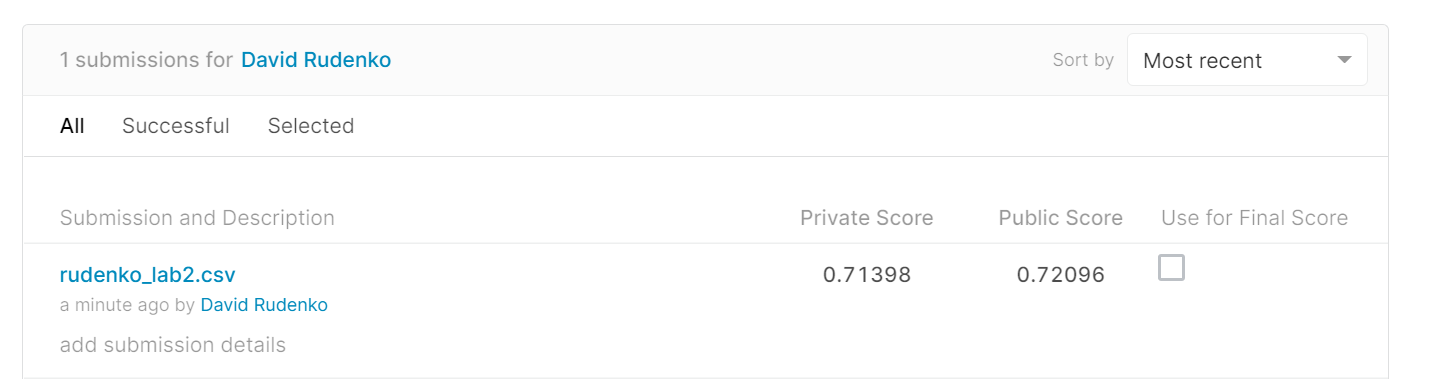

In [1]:
from IPython.display import Image
Image("submission-pic.png")